# Anomaly Detection Project
- By Rajaram Gautam and Schmint Scott

In [29]:
# Imports
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import pandas as pd
from datetime import datetime

import wrangle_g as wg

pd.set_option("display.max_rows", None, "display.max_columns", None) 

pd.reset_option("display.max_rows", "display.max_columns")

# Acquire and Prepare Steps

In [2]:
cur_df = wg.prep_cur_df()

In [3]:
cur_df.head()

,path,user_id,cohort_id,ip,name,slack,start_date,end_date,created_at,updated_at,program_id,id,course_name,course_subdomain,date_time,date_year,date_month,date_weekday,hour
0,/,1,8,97.105.19.61,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,1,1,PHP Full Stack Web Dev,php,2018-01-26 09:55:03,2018,January,Friday,9
1,java-ii,1,8,97.105.19.61,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,1,1,PHP Full Stack Web Dev,php,2018-01-26 09:56:02,2018,January,Friday,9
2,java-ii/object-oriented-programming,1,8,97.105.19.61,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,1,1,PHP Full Stack Web Dev,php,2018-01-26 09:56:05,2018,January,Friday,9
3,slides/object_oriented_programming,1,8,97.105.19.61,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,1,1,PHP Full Stack Web Dev,php,2018-01-26 09:56:06,2018,January,Friday,9
4,javascript-i/conditionals,2,22,97.105.19.61,Teddy,#teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,2,2,Java Full Stack Web Dev,java,2018-01-26 09:56:24,2018,January,Friday,9


In [4]:
cur_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 847329 entries, 0 to 847329
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   path              847329 non-null  object        
 1   user_id           847329 non-null  int64         
 2   cohort_id         847329 non-null  int64         
 3   ip                847329 non-null  object        
 4   name              847329 non-null  object        
 5   slack             847329 non-null  object        
 6   start_date        847329 non-null  datetime64[ns]
 7   end_date          847329 non-null  datetime64[ns]
 8   created_at        847329 non-null  datetime64[ns]
 9   updated_at        847329 non-null  datetime64[ns]
 10  program_id        847329 non-null  int64         
 11  id                847329 non-null  int64         
 12  course_name       847329 non-null  object        
 13  course_subdomain  847329 non-null  object        
 14  date

# 1. Which lesson appears to attract the most traffic consistently across cohorts (per program)?

In [7]:
cur_df.head(1)

,path,user_id,cohort_id,ip,name,slack,start_date,end_date,created_at,updated_at,program_id,id,course_name,course_subdomain,date_time,date_year,date_month,date_weekday,hour
0,/,1,8,97.105.19.61,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,1,1,PHP Full Stack Web Dev,php,2018-01-26 09:55:03,2018,January,Friday,9


In [8]:
# Removing all the paths that are not a lesson
lesson = cur_df.copy()
lesson = lesson[lesson.path.str.endswith('jpg') == False]
lesson = lesson[lesson.path.str.endswith('jpeg') == False]
lesson = lesson[lesson.path.str.endswith('svg') == False]
lesson = lesson[(lesson.path != '/') & (lesson.path != 'search/search_index.json') 
                & (lesson.path != 'toc') & (lesson.path != 'appendix')]

In [10]:
# List of top 20 lessons across all cohorts:
top_lessons = pd.DataFrame(lesson.path.value_counts().head(20))
top_lessons

,path
javascript-i,18203
java-iii,13166
html-css,13127
java-ii,12177
spring,11883
jquery,11041
mysql,10611
java-i,10467
javascript-ii,10294
javascript-i/introduction/working-with-data-types-operators-and-variables,7326


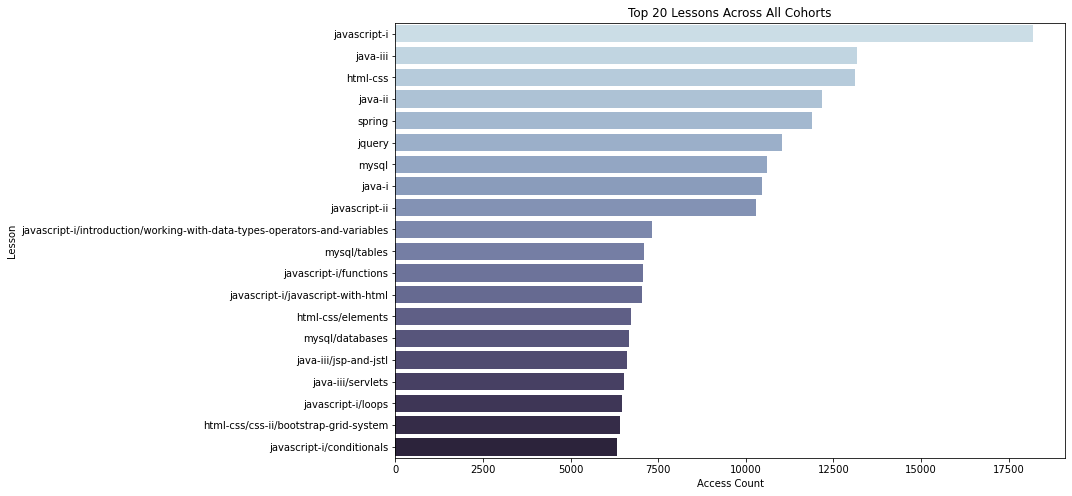

In [11]:
# Plot of top 20 lessons across all cohorts:
plt.figure(figsize=(12, 8))
sns.barplot(data=top_lessons,
    x="path", y=top_lessons.index, palette="ch:s=.25,rot=-.25", )
plt.title('Top 20 Lessons Across All Cohorts')
plt.xlabel('Access Count')
plt.ylabel('Lesson')
plt.show()

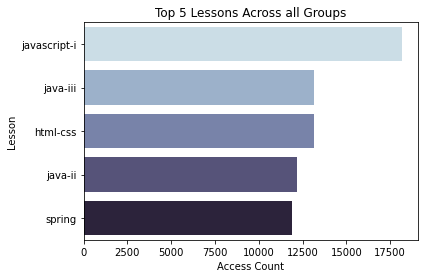

,path
javascript-i,18203
java-iii,13166
html-css,13127
java-ii,12177
spring,11883


In [12]:
# Top 5 lessons for all Groups
top_course_lessons = pd.DataFrame(lesson.path.value_counts().head(5))
plt.figure(figsize=(6, 4))
sns.barplot(data=top_course_lessons,
x="path", y=top_course_lessons.index, palette="ch:s=.25,rot=-.25", )
plt.title('Top 5 Lessons Across all Groups')
plt.xlabel('Access Count')
plt.ylabel('Lesson')
plt.show()
top_course_lessons

###### Top Five Lessons for each program

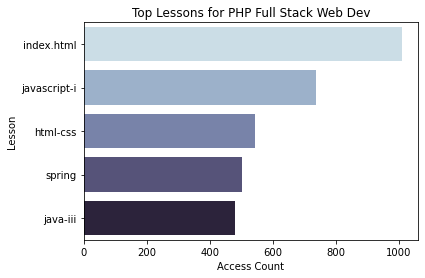

,path
index.html,1011
javascript-i,736
html-css,542
spring,501
java-iii,479


In [14]:
# Top lessons for PHP Web Dev
top_course_lessons = pd.DataFrame(lesson[lesson.course_subdomain == 'php'].path.value_counts().head(5))
plt.figure(figsize=(6, 4))
sns.barplot(data=top_course_lessons,
x="path", y=top_course_lessons.index, palette="ch:s=.25,rot=-.25", )
plt.title('Top Lessons for PHP Full Stack Web Dev')
plt.xlabel('Access Count')
plt.ylabel('Lesson')
plt.show()
top_course_lessons

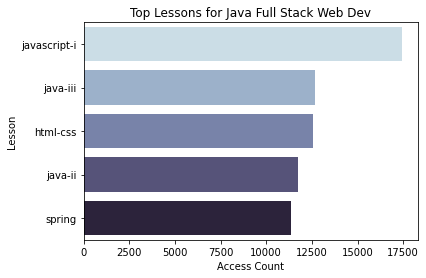

,path
javascript-i,17457
java-iii,12683
html-css,12569
java-ii,11719
spring,11376


In [15]:
# Top lessons for Java Full Stack Web Dev
top_course_lessons = pd.DataFrame(lesson[lesson.course_subdomain == 'java'].path.value_counts().head(5))
plt.figure(figsize=(6, 4))
sns.barplot(data=top_course_lessons,
x="path", y=top_course_lessons.index, palette="ch:s=.25,rot=-.25", )
plt.title('Top Lessons for Java Full Stack Web Dev')
plt.xlabel('Access Count')
plt.ylabel('Lesson')
plt.show()
top_course_lessons

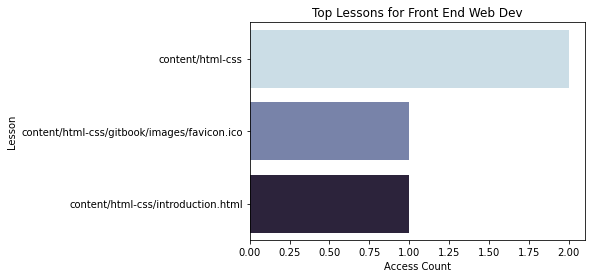

,path
content/html-css,2
content/html-css/gitbook/images/favicon.ico,1
content/html-css/introduction.html,1


In [16]:
# Top lessons for Front End Web Dev
top_course_lessons = pd.DataFrame(lesson[lesson.course_subdomain == 'fe'].path.value_counts().head(5))
plt.figure(figsize=(6, 4))
sns.barplot(data=top_course_lessons,
x="path", y=top_course_lessons.index, palette="ch:s=.25,rot=-.25", )
plt.title('Top Lessons for Front End Web Dev')
plt.xlabel('Access Count')
plt.ylabel('Lesson')
plt.show()
top_course_lessons

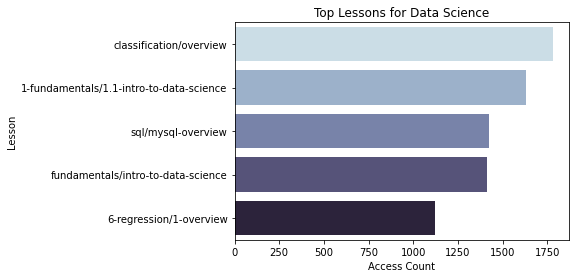

,path
classification/overview,1785
1-fundamentals/1.1-intro-to-data-science,1633
sql/mysql-overview,1424
fundamentals/intro-to-data-science,1413
6-regression/1-overview,1124


In [17]:
# Top lessons for Data Science
top_course_lessons = pd.DataFrame(lesson[lesson.course_subdomain == 'ds'].path.value_counts().head(5))
plt.figure(figsize=(6, 4))
sns.barplot(data=top_course_lessons,
x="path", y=top_course_lessons.index, palette="ch:s=.25,rot=-.25", )
plt.title('Top Lessons for Data Science')
plt.xlabel('Access Count')
plt.ylabel('Lesson')
plt.show()
top_course_lessons

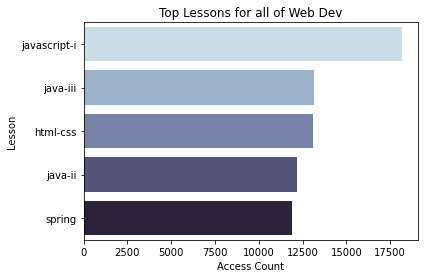

,path
javascript-i,18193
java-iii,13162
html-css,13111
java-ii,12173
spring,11877


In [18]:
# Top lessons for all Web Dev
top_course_lessons = pd.DataFrame(lesson[lesson.course_subdomain != 'ds'].path.value_counts().head(5))
plt.figure(figsize=(6, 4))
sns.barplot(data=top_course_lessons,
x="path", y=top_course_lessons.index, palette="ch:s=.25,rot=-.25", )
plt.title('Top Lessons for all of Web Dev')
plt.xlabel('Access Count')
plt.ylabel('Lesson')
plt.show()
top_course_lessons

For PHP Full Stack Web Dev, students access following coureses most
1. index.html
2. javascript-i
3. html-css

For Full Stack Web Dev , students access following courses most
1. javascript-i
2. java-iii
3. html-css

For the Front End Web Dev, students access following courses most
1. content/html-css
2. content/html-css/gitbook/images/favicon.ico
3. content/html-css/im=ntroduction.html

For Data Science, students access following courses most
1. Classification / overview
2. 1-fundamentals/1.1-intro-to-data-science
3. sql/mysql-overview

# 2. Is there a cohort that referred to a lesson significantly more than other cohorts seemed to gloss over?

In [20]:
lesson.head(1)

,path,user_id,cohort_id,ip,name,slack,start_date,end_date,created_at,updated_at,program_id,id,course_name,course_subdomain,date_time,date_year,date_month,date_weekday,hour
1,java-ii,1,8,97.105.19.61,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,1,1,PHP Full Stack Web Dev,php,2018-01-26 09:56:02,2018,January,Friday,9


In [21]:
cohort_keys = lesson.name.unique()
cohort_keys

array(['Hampton', 'Teddy', 'Sequoia', 'Arches', 'Niagara', 'Pinnacles',
       'Quincy', 'Kings', 'Lassen', 'Mammoth', 'Glacier', 'Denali',
       'Joshua', 'Olympic', 'Ulysses', 'Badlands', 'Apollo', 'Ike',
       'Voyageurs', 'Wrangell', 'Xanadu', 'Franklin', 'Yosemite', 'Staff',
       'Zion', 'Andromeda', 'Betelgeuse', 'Ceres', 'Bayes', 'Deimos',
       'Europa', 'Fortuna', 'Curie', 'Apex', 'Ganymede', 'Hyperion',
       'Darden', 'Bash', 'Jupiter', 'Kalypso', 'Luna', 'Easley', 'Marco',
       'Florence', 'Neptune', 'Oberon'], dtype=object)

In [22]:
# For loop to gather the top five lessons for each cohort
list_of_cohorts = []
cohort_keys = lesson.name.unique()

for keys in cohort_keys:
    cohorts = pd.DataFrame(lesson[lesson.name == keys].path.value_counts().head(5))
    list_of_cohorts.append(cohorts)

In [23]:
# Dataframe with all of the cohorts top five lessons!
top_cohort_lesson = pd.concat(list_of_cohorts, keys=cohort_keys, names=['cohort', 'lesson'])
top_cohort_lesson.head(10)

path
cohort  lesson                        
Hampton java-iii                    57
        java-ii                     46
        java-i                      46
        spring                      43
        javascript-i                36
Teddy   spring                     744
        java-iii                   732
        mysql                      638
        javascript-i               615
        mkdocs/search_index.json   595

In [24]:
tcl = top_cohort_lesson.reset_index(level=[0,1])
tcl.head(10)

,cohort,lesson,path
0,Hampton,java-iii,57
1,Hampton,java-ii,46
2,Hampton,java-i,46
3,Hampton,spring,43
4,Hampton,javascript-i,36
5,Teddy,spring,744
6,Teddy,java-iii,732
7,Teddy,mysql,638
8,Teddy,javascript-i,615
9,Teddy,mkdocs/search_index.json,595


In [25]:
tcl.lesson.value_counts().tail(20)

content/php_i                                       1
java-iii/user-input                                 1
content/html-css/elements.html                      1
spring/fundamentals/repositories                    1
content/laravel/intro/environment.html              1
content/laravel/intro/gitbook/images/favicon.ico    1
prework/databases                                   1
prework/versioning/github                           1
content/javascript                                  1
content/mysql/intro-to-mysql                        1
java-i/methods                                      1
javascript-ii/es6                                   1
content/php_ii/command-line                         1
content/php_ii/command-line/io-streams.html         1
content/php_ii/control-structures-i                 1
content/php_ii                                      1
content/html-css/gitbook/images/favicon.ico         1
html-css/introduction                               1
html-css/forms              

In [26]:
tcl[tcl.lesson == 'javascript-i/introduction/working-with-data-types-operators-and-variables'].sort_values('path', ascending=False)

,cohort,lesson,path
207,Marco,javascript-i/introduction/working-with-data-ty...,505
216,Neptune,javascript-i/introduction/working-with-data-ty...,329
197,Luna,javascript-i/introduction/working-with-data-ty...,315
224,Oberon,javascript-i/introduction/working-with-data-ty...,146
51,Glacier,javascript-i/introduction/working-with-data-ty...,24


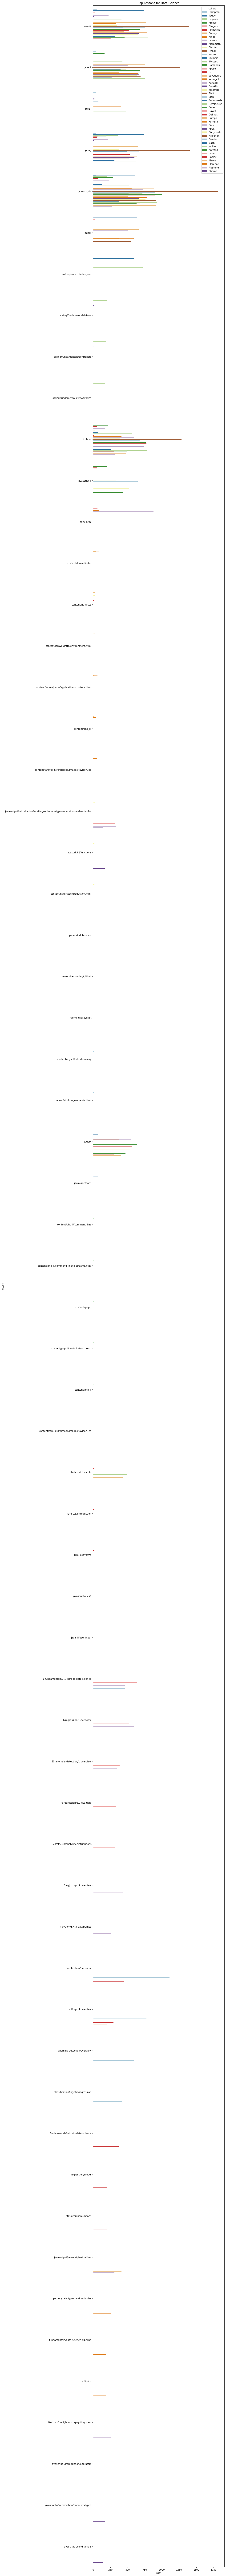

In [28]:
plt.figure(figsize=(10, 200))
sns.barplot(data=tcl, x="path", y="lesson", 
            hue="cohort", palette="Paired", )
plt.title('Top Lessons for Data Science')
plt.show()

###### Findings:

- The Staff accessed the top lessons the most
- Darden cohort accessed the "Stats/compare-means" twice as much as Easley
- Darden cohort accessed the "sql/mysql-overview" more than three time as much as Easley or Florence
- Ceres cohort accessed the "jquery" more than any other cohort
- Marco cohort accessed the "javascript-i/introduction/working-with-data-types-operators-and-variables" lesson more times than the four other cohorts that accessed that page by a path count of 176

# 3. Are there students who, when active, hardly access the curriculum? If so, what information do you have about these students?

Let us create DataFrame with amount of times each user access the curriculum when they are active students

In [65]:
active_student = lesson[lesson.index < lesson.end_date]

In [66]:
active_student.head(3)

,path,user_id,cohort_id,ip,name,slack,start_date,end_date,created_at,updated_at,program_id,id,course_name,course_subdomain,date_year,date_month,date_weekday,hour,date_time
date_time,,,,,,,,,,,,,,,,,,,
2018-01-26 09:56:24,javascript-i/conditionals,2,22,97.105.19.61,Teddy,#teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,2,2,Java Full Stack Web Dev,java,2018,January,Friday,9,2018
2018-01-26 09:56:41,javascript-i/loops,2,22,97.105.19.61,Teddy,#teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,2,2,Java Full Stack Web Dev,java,2018,January,Friday,9,2018
2018-01-26 09:56:46,javascript-i/conditionals,3,22,97.105.19.61,Teddy,#teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,2,2,Java Full Stack Web Dev,java,2018,January,Friday,9,2018


In [67]:
num_time_student_active = pd.DataFrame(active_student.user_id.value_counts())

In [68]:
num_time_student_active.head()

,user_id
344,4581
570,3501
671,2900
823,2774
794,2722


In [70]:
num_time_student_active.tail(20)

,user_id
772,24
49,22
24,22
487,16
963,15
961,15
889,14
968,14
340,13
64,13


# 4. Is there any suspicious activity, such as users/machines/etc accessing the curriculum who shouldn’t be? Does it appear that any web-scraping is happening? Are there any suspicious IP addresses?

In [72]:
lesson.user_id.value_counts().head(11)

64     14411
11     13503
53     11911
314     7214
1       5807
428     5652
495     5328
344     5178
581     4828
315     4112
248     4053
Name: user_id, dtype: int64

In [74]:
# mean counts of users accessing curriculum
lesson.user_id.value_counts().mean()

824.3340757238308

In [75]:
# calculating standard deviation among the users
lesson.user_id.value_counts().std()

1068.235628319539

In [81]:
# organizing accessions by ip address
group_based_ip = lesson.groupby('ip').count()['path'].sort_values(ascending = False)

In [83]:
# defining multiplier
k = 3

# ip addressses whose activity is 3 standard deviations above the mean
anomalos_ip = group_based_ip[group_based_ip > (group_based_ip.mean() + k * group_based_ip.std())]
anomalos_ip.head()

ip
97.105.19.58    241019
97.105.19.61     56968
Name: path, dtype: int64

Thus, there are two anamalous ip addresses, which is active more than 3 σ above the μ.

In [85]:
# Let us look at all the records visited by that first ip
lesson[lesson.ip == '97.105.19.58']

,path,user_id,cohort_id,ip,name,slack,start_date,end_date,created_at,updated_at,program_id,id,course_name,course_subdomain,date_year,date_month,date_weekday,hour,date_time
date_time,,,,,,,,,,,,,,,,,,,
2018-07-16 07:51:57,javascript-ii/promises,211,1,97.105.19.58,Arches,#arches,2014-02-04,2014-04-22,2016-06-14 19:52:26,2016-06-14 19:52:26,1,1,PHP Full Stack Web Dev,php,2018,July,Monday,7,2018
2018-07-16 07:58:03,javascript-ii/map-filter-reduce,211,1,97.105.19.58,Arches,#arches,2014-02-04,2014-04-22,2016-06-14 19:52:26,2016-06-14 19:52:26,1,1,PHP Full Stack Web Dev,php,2018,July,Monday,7,2018
2018-07-16 07:59:50,javascript-ii/promises,211,1,97.105.19.58,Arches,#arches,2014-02-04,2014-04-22,2016-06-14 19:52:26,2016-06-14 19:52:26,1,1,PHP Full Stack Web Dev,php,2018,July,Monday,7,2018
2018-07-16 08:07:37,index.html,53,14,97.105.19.58,Lassen,#lassen,2016-07-18,2016-11-10,2016-07-18 19:06:27,2016-07-18 19:06:27,1,1,PHP Full Stack Web Dev,php,2018,July,Monday,8,2018
2018-07-16 08:07:41,javascript-ii,53,14,97.105.19.58,Lassen,#lassen,2016-07-18,2016-11-10,2016-07-18 19:06:27,2016-07-18 19:06:27,1,1,PHP Full Stack Web Dev,php,2018,July,Monday,8,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-03-19 12:05:13,java-i/syntax-types-and-variables,550,53,97.105.19.58,Fortuna,#fortuna,2020-01-13,2020-06-23,2020-01-13 21:17:08,2020-01-13 21:17:08,2,2,Java Full Stack Web Dev,java,2020,March,Thursday,12,2020
2020-03-23 09:51:58,html-css,257,28,97.105.19.58,Staff,#,2014-02-04,2014-02-04,2018-12-06 17:04:19,2018-12-06 17:04:19,2,2,Java Full Stack Web Dev,java,2020,March,Monday,9,2020
2020-03-23 12:34:03,html-css/introduction,257,28,97.105.19.58,Staff,#,2014-02-04,2014-02-04,2018-12-06 17:04:19,2018-12-06 17:04:19,2,2,Java Full Stack Web Dev,java,2020,March,Monday,12,2020


In [86]:
# Let us look at all the records visited by that second ip
lesson[lesson.ip == '97.105.19.61']

,path,user_id,cohort_id,ip,name,slack,start_date,end_date,created_at,updated_at,program_id,id,course_name,course_subdomain,date_year,date_month,date_weekday,hour,date_time
date_time,,,,,,,,,,,,,,,,,,,
2018-01-26 09:56:02,java-ii,1,8,97.105.19.61,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,1,1,PHP Full Stack Web Dev,php,2018,January,Friday,9,2018
2018-01-26 09:56:05,java-ii/object-oriented-programming,1,8,97.105.19.61,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,1,1,PHP Full Stack Web Dev,php,2018,January,Friday,9,2018
2018-01-26 09:56:06,slides/object_oriented_programming,1,8,97.105.19.61,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,1,1,PHP Full Stack Web Dev,php,2018,January,Friday,9,2018
2018-01-26 09:56:24,javascript-i/conditionals,2,22,97.105.19.61,Teddy,#teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,2,2,Java Full Stack Web Dev,java,2018,January,Friday,9,2018
2018-01-26 09:56:41,javascript-i/loops,2,22,97.105.19.61,Teddy,#teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,2,2,Java Full Stack Web Dev,java,2018,January,Friday,9,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-07-13 16:30:53,java-ii/object-oriented-programming,26,18,97.105.19.61,Pinnacles,#pinnacles,2017-03-27,2017-07-20,2017-03-28 00:33:12,2017-03-28 00:33:12,2,2,Java Full Stack Web Dev,java,2018,July,Friday,16,2018
2018-07-13 16:30:55,slides/object_oriented_programming,26,18,97.105.19.61,Pinnacles,#pinnacles,2017-03-27,2017-07-20,2017-03-28 00:33:12,2017-03-28 00:33:12,2,2,Java Full Stack Web Dev,java,2018,July,Friday,16,2018
2018-07-13 16:38:29,spring,130,23,97.105.19.61,Ulysses,#ulysses,2018-03-05,2018-07-19,2018-03-05 14:22:11,2018-03-05 14:22:11,2,2,Java Full Stack Web Dev,java,2018,July,Friday,16,2018


On second ip address, it looks like the user is glancing over, as he is not statying in page for while.

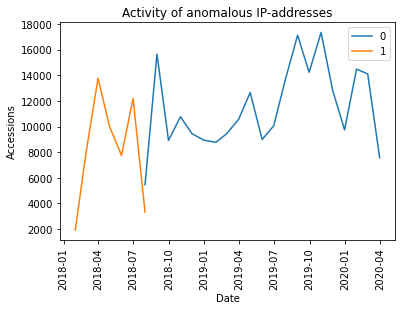

In [90]:
# Plotting the activity of the two anomalous ip addresses
for idx in range(2):
    plt.plot(lesson[lesson.ip == anomalos_ip.index[idx]].resample('M').count().iloc[:,0])
plt.legend(range(2))
plt.xticks(rotation = 90) # Rotates the x labels so that they don't overlap
plt.ylabel('Accessions')
plt.xlabel('Date')
plt.title('Activity of anomalous IP-addresses')
plt.show()

In [ ]:
# Since they are not overlapping in time, it may be same person. Used to access curriculum from one ip and
# relocation changes his ip address

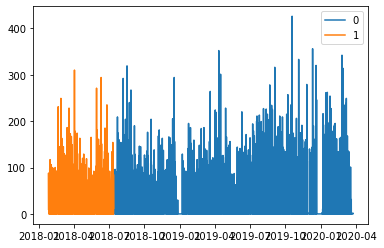

In [94]:
# Plotting the activity of anomalous ip adresses with increased granularity;
# by hour instead of by day
for idx in range(2):
    plt.plot(lesson[lesson.ip == anomalos_ip.index[idx]].resample('H').count().iloc[:,0])
plt.legend(range(2))
plt.show()

Its activity has decreased on 2019 and 2020 at one time.

# 5. At some point in 2019, the ability for students and alumni to access both curriculums (web dev to ds, ds to web dev) should have been shut off. Do you see any evidence of that happening? Did it happen before?

In [46]:
# lesson['timestamp_year'] = lesson.index.date_year
lesson.head(1)

,path,user_id,cohort_id,ip,name,slack,start_date,end_date,created_at,updated_at,program_id,id,course_name,course_subdomain,date_time,date_year,date_month,date_weekday,hour
1,java-ii,1,8,97.105.19.61,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,1,1,PHP Full Stack Web Dev,php,2018-01-26 09:56:02,2018,January,Friday,9


In [31]:
# To see if ds students are accessing web dev:
lesson[lesson.course_subdomain == 'ds'].path.value_counts().tail(50)

12-distributed-ml/6.2-prepare-part-2              1
12-distributed-ml/6.3-prepare-part-3              1
12-distributed-ml/8.1-classification              1
git/cli                                           1
7.4.1-pandas-overview                             1
7.4.2-series                                      1
spring/extra-features/error-pages                 1
spring/extra-features/error-pages/asdfasdf        1
java-i/console-io                                 1
appendix/univariate_regression_in_excel           1
5-stats/4.2-compare-means/null                    1
itc-ml                                            1
itc%20-%20ml                                      1
2-storytelling/chart-types                        1
5-detecting-with-clustering                       1
end_to_end_clustering                             1
End_to_End_clustering                             1
javascript-i/conditionals                         1
appendix/git/intellij                             1
.gitignore  

In [34]:
# Exploring all ds students from 2020 and later
ds = lesson[lesson.course_subdomain == 'ds']
ds[ds.date_year > 2019].head(1)

,path,user_id,cohort_id,ip,name,slack,start_date,end_date,created_at,updated_at,program_id,id,course_name,course_subdomain,date_time,date_year,date_month,date_weekday,hour
394796,10-anomaly-detection/1-overview,476,34,136.50.49.145,Bayes,#,2019-08-19,2020-01-30,2019-08-20 14:38:55,2019-08-20 14:38:55,3,3,Data Science,ds,2020-01-01 15:35:02,2020,January,Wednesday,15


In [36]:
ds[ds.date_year > 2019].path.value_counts().tail(50)

sql.mysql-overview                                           1
sql/database                                                 1
databases                                                    1
group-by                                                     1
,%20https://github.com/RaulCPena                             1
joins                                                        1
7-classification/confusion-matrix.md                         1
case-statements                                              1
sql                                                          1
where                                                        1
regression/project/null                                      1
%20https://github.com/RaulCPena                              1
classification/explore-old                                   1
2.1-spreadsheets-overview                                    1
creating-charts                                              1
10-anomaly-detection/isolation-forests                 

###### Findings:
Although there are less, there are at least two instances of ds students wd site: java-ii/object-oriented-programming and spring

In [37]:
# Now exploring web dev:
wd = lesson[lesson.course_subdomain != 'ds']
wd.head(1)

,path,user_id,cohort_id,ip,name,slack,start_date,end_date,created_at,updated_at,program_id,id,course_name,course_subdomain,date_time,date_year,date_month,date_weekday,hour
1,java-ii,1,8,97.105.19.61,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,1,1,PHP Full Stack Web Dev,php,2018-01-26 09:56:02,2018,January,Friday,9


In [38]:
# Web dev over all of the years:
wd.path.value_counts().tail(50)

capstones                                                       1
cheatsheet.tex                                                  1
javascript-i/math                                               1
logouts                                                         1
professional-development/cover-letter                           1
python                                                          1
students/743/notes                                              1
students/743/notes/0                                            1
students/743/notes/1                                            1
src                                                             1
help                                                            1
glossary                                                        1
html-css/img/favicon.ico                                        1
main-pages_xXxXx.html                                           1
relationships/indexes                                           1
SVM_NLP   

In [41]:
# Web Dev after 2019:
wd[wd.date_year > 2019].path.value_counts().tail(50)

content/php_iii/php-with-html/handling-user-input.html          1
professional-development/professional-resume                    1
python/objects                                                  1
jquery/ajax.json                                                1
content/php_iv/php-with-mysql/query-and-results.html            1
content/php_iv/php-with-mysql/prepared-statements.html          1
git/cli                                                         1
syntax-types-and-variables                                      1
curie-python-assessment.html                                    1
appendix/further-reading/mysql/host-wildcards.md                1
curie-python-assessment                                         1
anomaly-detection/time-series-anomaly-detection-part-2          1
content/javascript/objects                                      1
content/javascript/bom-and-dom/dom-events.html                  1
timeseries                                                      1
html-css/c

###### Findings:

For web Dev, they did seem to access the Data Science curriculum fairly often prior to having access denied. After 2019, there was a large drop off, but there seems to be a few cases where a data science topic was accessed.

# 6. What topics are grads continuing to reference after graduation and into their jobs (for each program)?

In [47]:
lesson = lesson.set_index('date_time')

In [48]:
lesson.head(1)

,path,user_id,cohort_id,ip,name,slack,start_date,end_date,created_at,updated_at,program_id,id,course_name,course_subdomain,date_year,date_month,date_weekday,hour
date_time,,,,,,,,,,,,,,,,,,
2018-01-26 09:56:02,java-ii,1,8,97.105.19.61,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,1,1,PHP Full Stack Web Dev,php,2018,January,Friday,9


In [49]:
lesson['date_time'] = lesson.index.year
lesson.head(1)

,path,user_id,cohort_id,ip,name,slack,start_date,end_date,created_at,updated_at,program_id,id,course_name,course_subdomain,date_year,date_month,date_weekday,hour,date_time
date_time,,,,,,,,,,,,,,,,,,,
2018-01-26 09:56:02,java-ii,1,8,97.105.19.61,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,1,1,PHP Full Stack Web Dev,php,2018,January,Friday,9,2018


In [50]:
# Dataframe with paths that were accessed after a cohort's end date:
after_grad = lesson[lesson.index > lesson.end_date]

In [62]:
after_grad[after_grad.course_subdomain != 'p'].path.value_counts().head(10)

javascript-i     4969
spring           4273
html-css         3687
java-iii         3541
java-ii          3444
java-i           3130
javascript-ii    2981
mysql            2589
jquery           2469
index.html       1721
Name: path, dtype: int64

###### Findings:

Overall, the top ten lessons accessed by post grads are:
- javascript-i     4969
- spring           4272
- html-css         3687
- java-iii         3541
- java-ii          3444
- java-i           3130
- javascript-ii    2981
- mysql            2584
- jquery           2469
- index.html       1721

In [52]:
# For Data Science
after_grad[after_grad.course_subdomain == 'ds'].path.value_counts().head(10)

sql/mysql-overview                          275
classification/overview                     267
anomaly-detection/overview                  191
fundamentals/intro-to-data-science          184
1-fundamentals/1.1-intro-to-data-science    127
sql/database-design                          87
6-regression/1-overview                      86
classification/prep                          77
fundamentals/environment-setup               76
stats/compare-means                          73
Name: path, dtype: int64

In [53]:
# For Java
after_grad[after_grad.course_subdomain == 'java'].path.value_counts().head(10)

javascript-i                        4233
spring                              3771
html-css                            3145
java-iii                            3062
java-ii                             2990
java-i                              2686
javascript-ii                       2552
mysql                               2300
jquery                              2125
spring/fundamentals/repositories    1497
Name: path, dtype: int64

In [54]:
# For php
after_grad[after_grad.course_subdomain == 'php'].path.value_counts().head(10)

index.html       1011
javascript-i      736
html-css          542
spring            501
java-iii          479
java-ii           454
java-i            444
javascript-ii     429
jquery            344
mysql             284
Name: path, dtype: int64

In [55]:
# For front end developer
after_grad[after_grad.course_subdomain == 'fe'].path.value_counts().head(10)

content/html-css                               2
content/html-css/gitbook/images/favicon.ico    1
content/html-css/introduction.html             1
Name: path, dtype: int64

# 7. Which lessons are least accessed?

In [63]:
lesson.path.value_counts().tail(10)

npm                                                             1
web-design/ux/layout/.json                                      1
appendix/cls/2-listing-files                                    1
appendix/cli/2-Overview                                         1
appendix/cli/2-overview                                         1
cli/4-navigating-the-filesystem                                 1
content/mysql/relationships/indexes.html                        1
5-stats                                                         1
6-stats                                                         1
appendix/professional-development/post-interview-review-form    1
Name: path, dtype: int64

# 8. Anything else I should be aware of?